# Grayscale calibration notebook


Generates the height map corresponding to masks under a refractive index and wavelength.

Demonstrates the loading of a grayscale contrast curve calibration and saves the `.dxf` file with the correct layer grayvalues.



In [3]:



import sys
sys.path.insert(0,'../../')
# sys.path.insert(0,'../../../7. Tools/pyMOE-dev')
# sys.path.insert(0,'./pyMOE-dev')

from matplotlib import pyplot as plt 
import numpy as np 

from scipy.constants import micro, nano, milli
from scipy import ndimage

import pyMOE as moe 


In [4]:
%load_ext autoreload
%autoreload 2


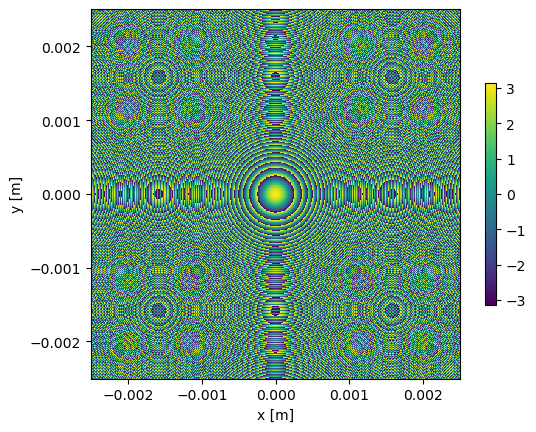

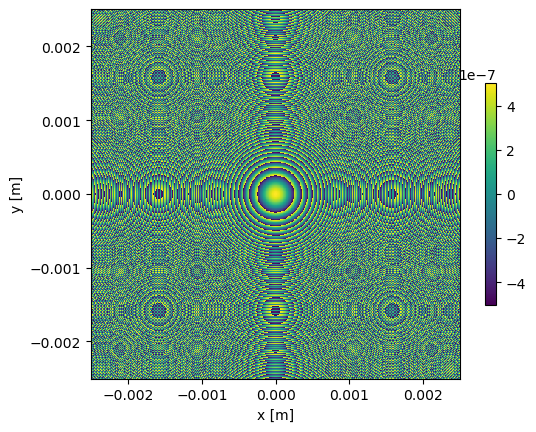

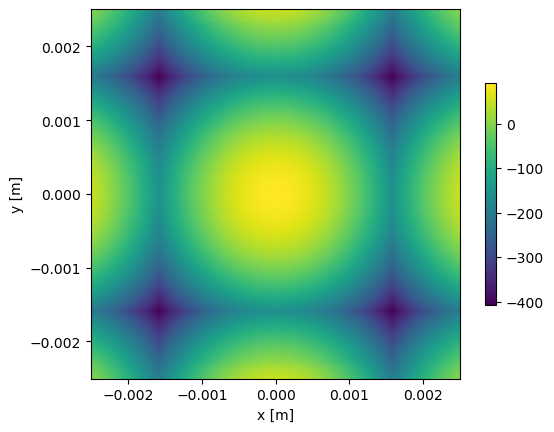

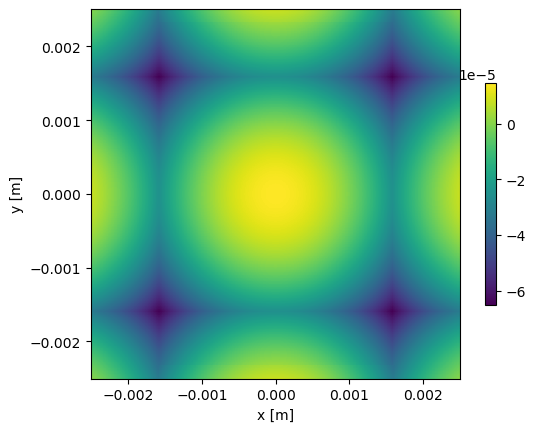

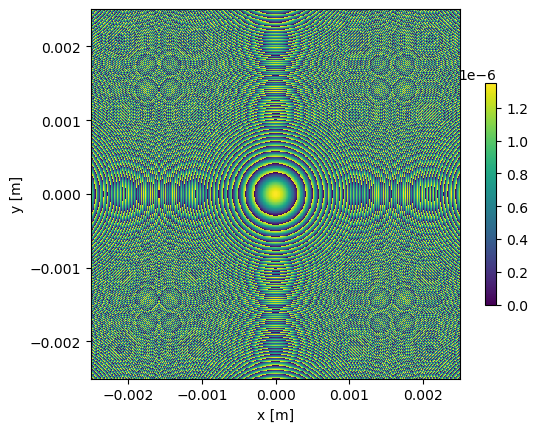

In [5]:
####generate a fresnel phase mask and save it into gds 

focal_length = 50e-3
Nx = Ny = 501
wavelength = 633*nano 

refractive_index_633 = 1.630115

width = 5000*micro
height = 5000*micro
###Fresnel phase mask 
aperture1 = moe.generate.create_empty_aperture(-width/2, width/2, Nx, -height/2, height/2, Ny,)

mask1 = moe.generate.fresnel_phase(aperture1, focal_length , wavelength )


moe.plotting.plot_aperture(mask1)

mask1.phase2height(wavelength, refractive_index_633)



moe.plotting.plot_aperture(mask1)

mask1.height2phase(wavelength, refractive_index_633)

mask1.phase_unwrap()
moe.plotting.plot_aperture(mask1)

mask1.phase2height(wavelength, refractive_index_633)

moe.plotting.plot_aperture(mask1)


mask1.modulos(1.35*micro, normalize_to_max=True)
moe.plotting.plot_aperture(mask1)

In [6]:
mask1.discretize(64)
###########################################################
#######Export the mask 
# Create GDSMask
gdsmask = moe.GDSMask(mask1)

# Create layout and merge polygons together
layout = gdsmask.create_layout(merge=True)

# Write layout to GDS file
gdsfile = "examplemask.dxf"   #name of gds file 

gdsmask.write_layout(gdsfile)





<class 'pyMOE.aperture.Aperture'>
Mask has 251001 number of points distributed in 64 layers
Creating individual pixel polygons
Progress: [####################] 100.0%
[Create Polygons]
Elapsed: 0:00:07.982521
Merging polygons inside layers
Progress: [####################] 100.0%
[Merging polygons]
Elapsed: 0:00:01.766567
[Total time converting to GDS]
Elapsed: 0:00:09.750083
Saving file to examplemask.dxf
[Saving GDS file]
Elapsed: 0:00:08.534952
Saved examplemask.dxf


Grayscale calibration range is 1.789 um
Loaded mask with 64 levels
Mask range is 1.329 um
[Saving calibrated GDS file]
Elapsed: 0:00:08.481061
Saved examplemask_grayscale.dxf


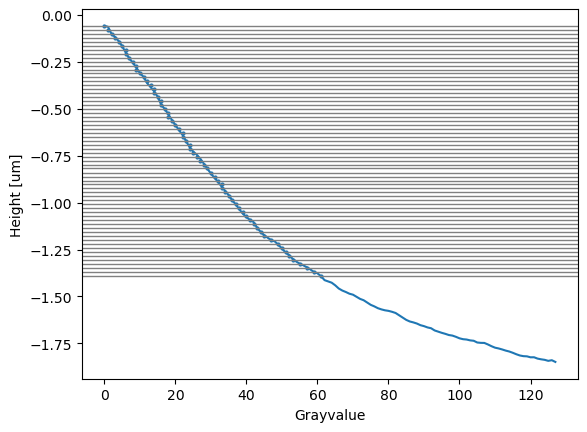

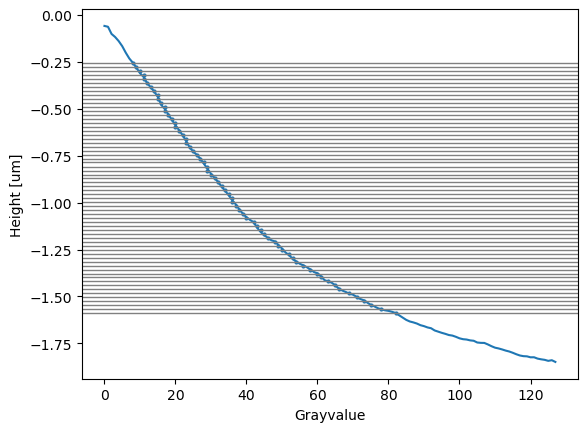

In [17]:
gscalibration = moe.GrayscaleCalibration()

gscalibration.load_calibration("calibration.csv")

# gscalibration.plot_calibration()

gscalibration.load_gdsfile(gdsfile)

gscalibration.get_levels_from_layer_names()
# gscalibration.plot_calibration()
# gscalibration.get_levels_from_height_range(1.5)


gscalibration.plot_calibration()

gscalibration.adjust_grayvalues(-0.2)
gscalibration.plot_calibration()

outfile = gdsfile.replace(".dxf", "_grayscale.dxf")

gscalibration.calibrate_layer_names()



corner_length = 500#*micro
corner_width = 100#*micro

field_width = 10000 #*micro
field_height = 10000 #*micro

layer = "layer127"
gscalibration.add_corners(field_width, field_height, corner_length, corner_width, layer)
label = "label 01"
gscalibration.add_label(label, position=(-4000, -4000), mag=1000, layer=layer)

gscalibration.save_calibrated_gdsfile(outfile)


# gscalibration = moe.GrayscaleCalibration()

# gscalibration.load_calibration("Pyra2_E80_F-20_greylevels.csv")

# gscalibration.plot_calibration()
